# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, roc_curve, confusion_matrix, cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTENC, SMOTE

from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# **Data Overview**

In [2]:
df_raw = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv', index_col=[-1])
df = df_raw.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB


In [5]:
df.columns = [col.replace(' ', '_') for col in df.columns]

<Axes: >

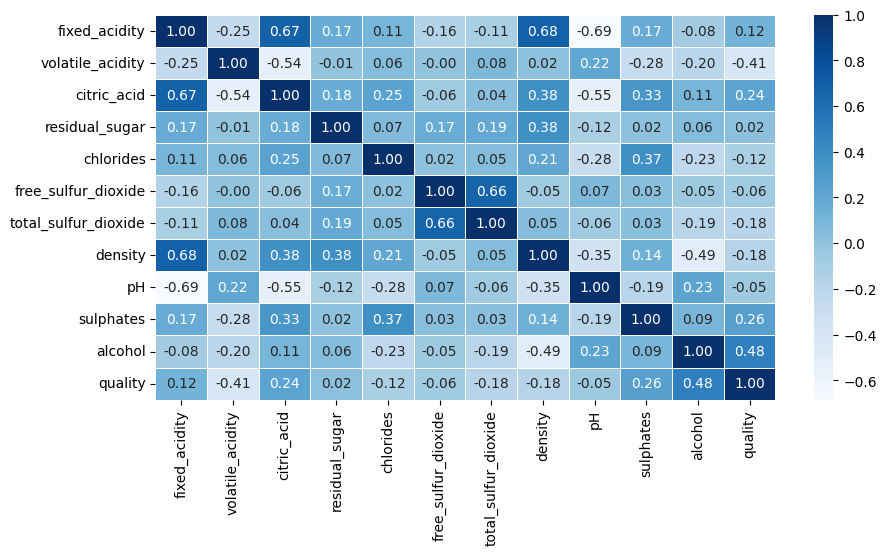

In [6]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5)


# **EDA**

#### Analysis of the **fixed_acidity** feature:

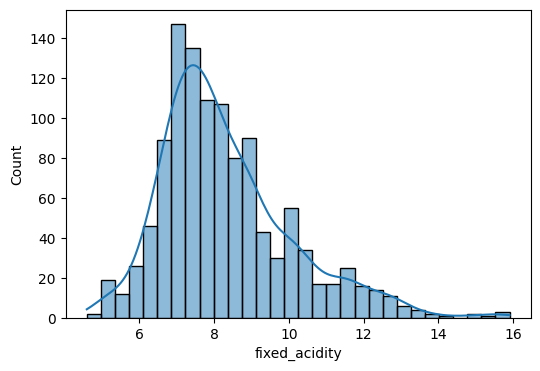

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df['fixed_acidity'], bins=30, kde=True);

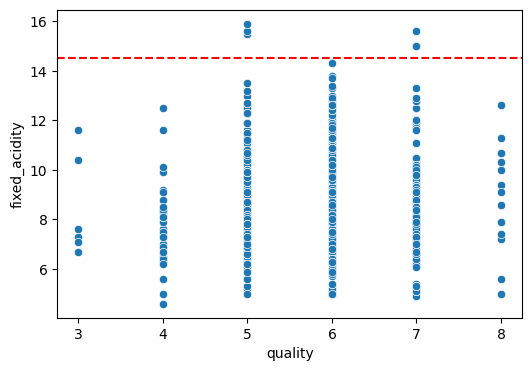

In [8]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['quality'], y=df['fixed_acidity'])
plt.axhline(y=14.5, color='red', linestyle='--');

In [9]:
df.query('fixed_acidity > 14.5')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
244,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
442,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
557,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
652,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5


#### Analysis of the **volatile_acidity** feature:

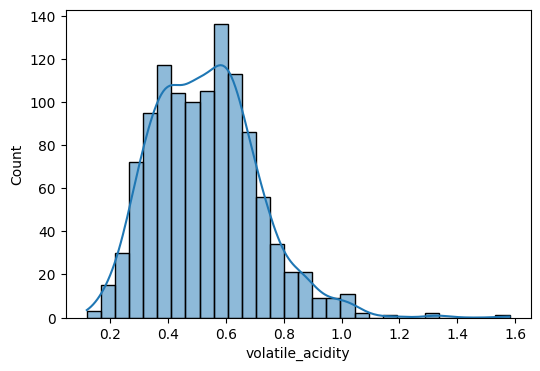

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df['volatile_acidity'], bins=30, kde=True);

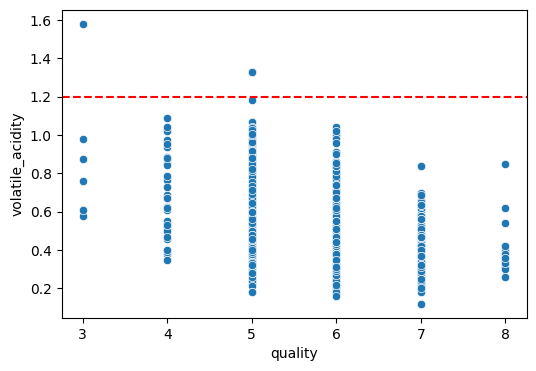

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['quality'], y=df['volatile_acidity'])
plt.axhline(y=1.2, color='red', linestyle='--');

In [12]:
df.query('volatile_acidity > 1.2')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
126,8.2,1.33,0.0,1.7,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5
127,8.1,1.33,0.0,1.8,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5
1299,7.6,1.58,0.0,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3


#### Analysis of the **volatile_acidity** feature:

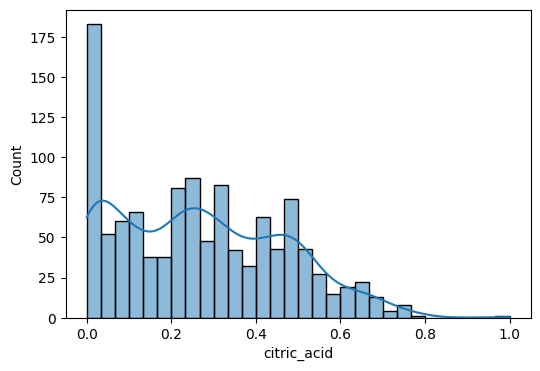

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df['citric_acid'], bins=30, kde=True);

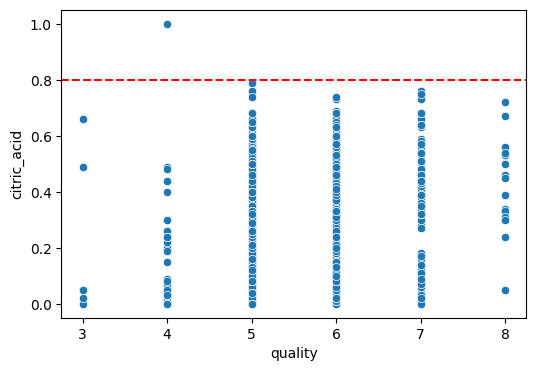

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['quality'], y=df['citric_acid'])
plt.axhline(y=0.8, color='red', linestyle='--');

In [15]:
df.query('citric_acid > 0.4 & quality == 3')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
459,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.0008,3.25,0.57,9.0,3
517,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.9994,3.16,0.63,8.4,3


In [16]:
df.query('citric_acid > 0.9 & quality == 4')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
151,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4


#### Analysis of the **residual_sugar** feature:

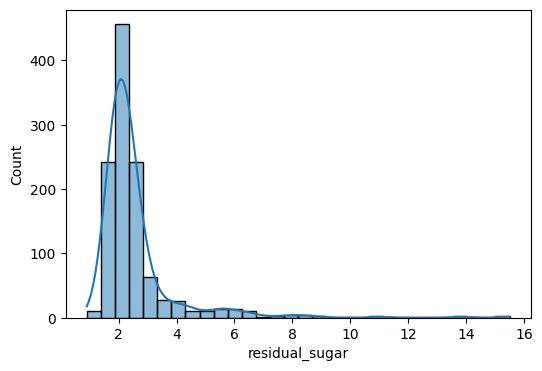

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df['residual_sugar'], bins=30, kde=True);

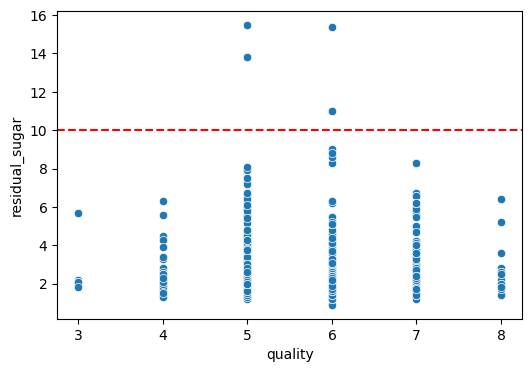

In [18]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['quality'], y=df['residual_sugar'])
plt.axhline(y=10, color='red', linestyle='--');

In [19]:
df.query('residual_sugar > 12 & quality == 5')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
480,10.6,0.28,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,5
1474,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
1476,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5


In [20]:
df.query('residual_sugar > 14 & quality == 6')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
1434,10.2,0.54,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6


#### Analysis of the **chlorides** feature:

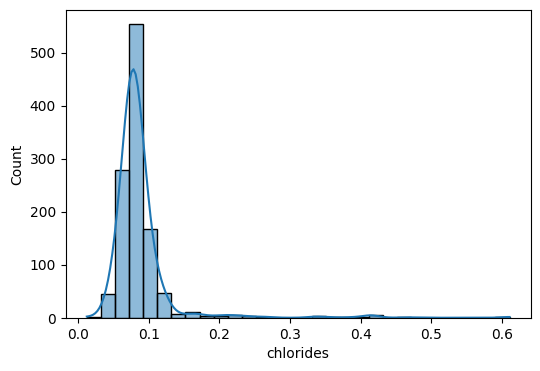

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(df['chlorides'], bins=30, kde=True);

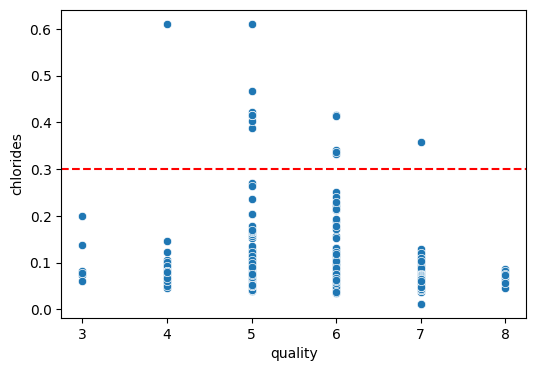

In [22]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['quality'], y=df['chlorides'])
plt.axhline(y=0.3, color='red', linestyle='--');

In [23]:
df.query('chlorides > 0.5 & quality == 4')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
151,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4


In [24]:
df.query('chlorides > 0.3 & quality == 7')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
281,7.7,0.27,0.68,3.5,0.358,5.0,10.0,0.9972,3.25,1.08,9.9,7


#### Analysis of the **free_sulfur_dioxide** feature:

In [25]:
log_tr = ['residual_sugar', 'chlorides', 'free_sulfur_dioxide']

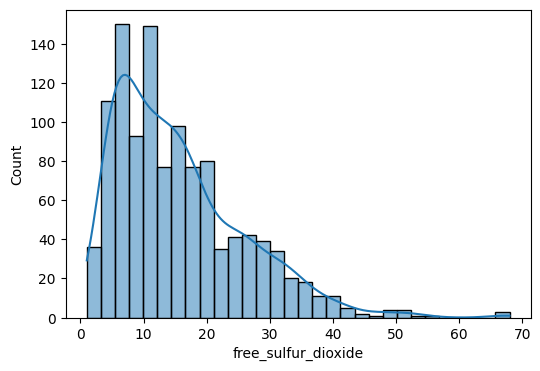

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(df['free_sulfur_dioxide'], bins=30, kde=True);

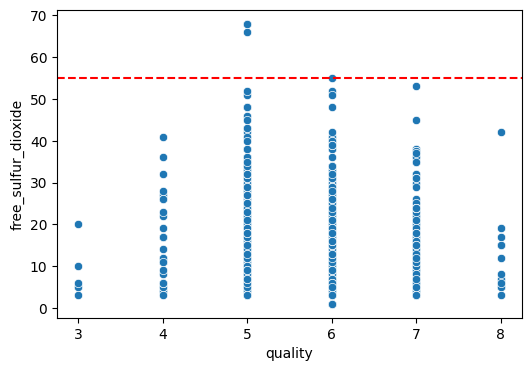

In [27]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['quality'], y=df['free_sulfur_dioxide'])
plt.axhline(y=55, color='red', linestyle='--');

In [28]:
df.query('free_sulfur_dioxide > 30 & quality == 8')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
1090,10.0,0.26,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8


In [29]:
df.query('free_sulfur_dioxide > 60 & quality == 5')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
396,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
400,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5


#### Analysis of the **total_sulfur_dioxide** feature:

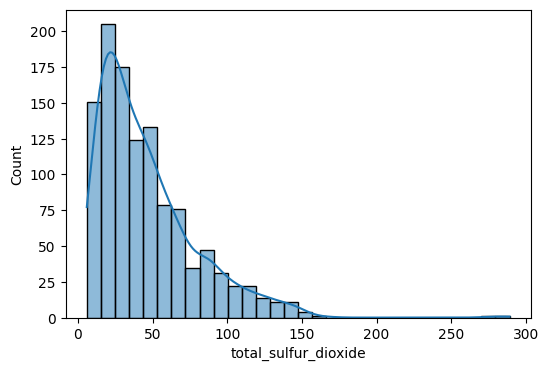

In [30]:
plt.figure(figsize=(6,4))
sns.histplot(df['total_sulfur_dioxide'], bins=30, kde=True);

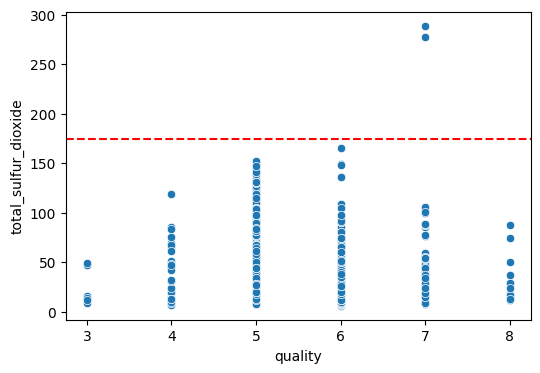

In [31]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['quality'], y=df['total_sulfur_dioxide'])
plt.axhline(y=175, color='red', linestyle='--');

In [32]:
df.query('total_sulfur_dioxide > 250 & quality == 7')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
1079,7.9,0.3,0.68,8.3,0.05,37.5,278.0,0.99316,3.01,0.51,12.3,7
1081,7.9,0.3,0.68,8.3,0.05,37.5,289.0,0.99316,3.01,0.51,12.3,7


#### Analysis of the **density** feature:

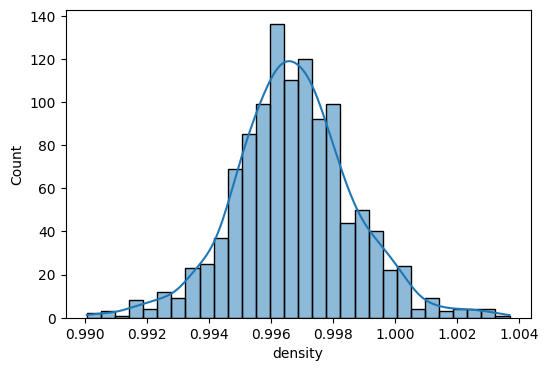

In [33]:
plt.figure(figsize=(6,4))
sns.histplot(df['density'], bins=30, kde=True);

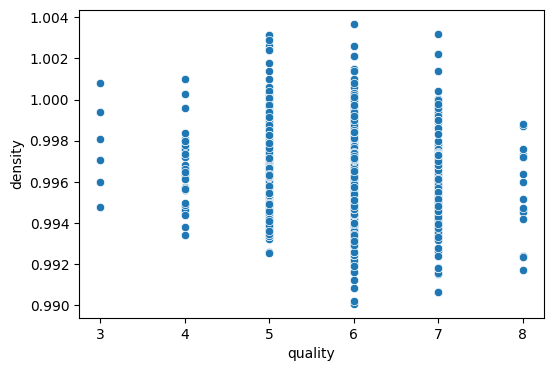

In [34]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['quality'], y=df['density']);

#### Analysis of the **pH** feature:

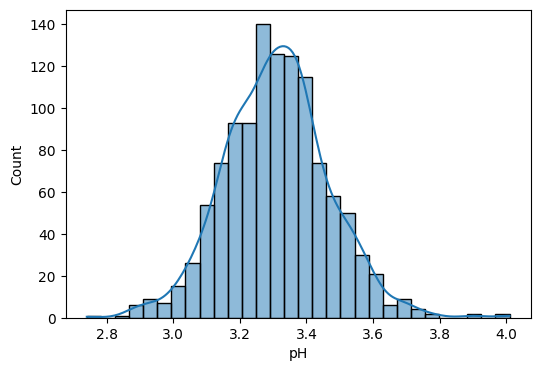

In [35]:
plt.figure(figsize=(6,4))
sns.histplot(df['pH'], bins=30, kde=True);

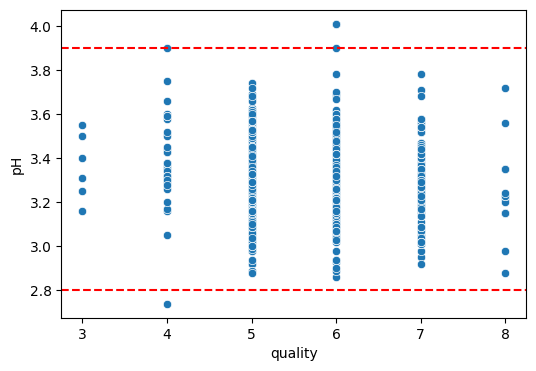

In [36]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['quality'], y=df['pH'])
plt.axhline(y=3.9, color='red', linestyle='--')
plt.axhline(y=2.8, color='red', linestyle='--');


In [37]:
df.query('pH < 3.0 & quality == 4')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
151,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4


In [38]:
df.query('pH > 3.9 & quality == 6')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
1316,5.4,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6
1321,5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6


#### Analysis of the **sulphates** feature:

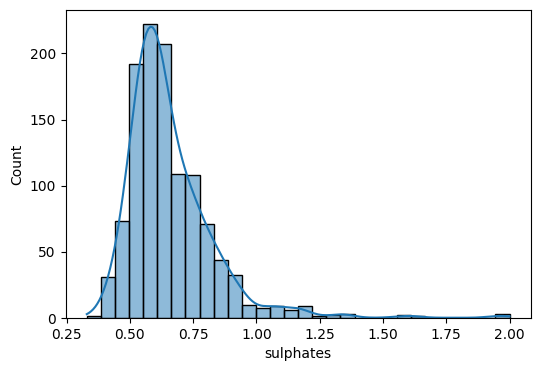

In [39]:
plt.figure(figsize=(6,4))
sns.histplot(df['sulphates'], bins=30, kde=True);

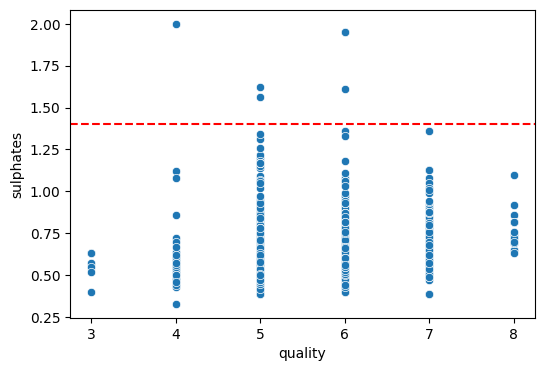

In [40]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['quality'], y=df['sulphates'])
plt.axhline(y=1.40, color='red', linestyle='--');

In [41]:
df.query('sulphates > 1.75 & quality == 4')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
151,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4


In [42]:
df.query('sulphates > 1.75 & quality == 6')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
86,8.6,0.49,0.28,1.9,0.11,20.0,136.0,0.9972,2.93,1.95,9.9,6
91,8.6,0.49,0.28,1.9,0.11,20.0,136.0,0.9972,2.93,1.95,9.9,6


#### Analysis of the **alcohol** feature:

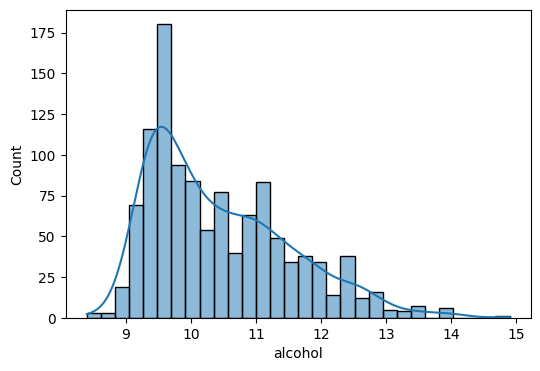

In [43]:
plt.figure(figsize=(6,4))
sns.histplot(df['alcohol'], bins=30, kde=True);

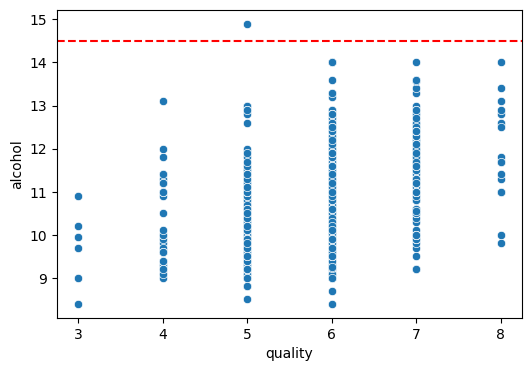

In [44]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['quality'], y=df['alcohol'])
plt.axhline(y=14.5, color='red', linestyle='--');

In [45]:
df.query('alcohol > 14 & quality == 5')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.9976,2.98,0.84,14.9,5


In [46]:
df.query('alcohol > 12.5 & quality == 4')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9,0.56,13.1,4


#### Summary of the analysis:

In [47]:
# indices of all outlier values after thorough analysis

outliers_idx = [243, 244, 442, 554, 557, 652, 1299, 126, 127, 1299, 151, 480, 1474, 1476, 1434, 151, 281, 396, 400, 1558, 1079, 1081, 151, 1316, 1321, 151, 86, 91, 652, 45]
print(f'The number of all outliers: {len(outliers_idx)}')
print(f'The percentage of outliers relative to the entire dataset: {round((len(outliers_idx) / len(df)) * 100, 2)} %')

The number of all outliers: 30
The percentage of outliers relative to the entire dataset: 2.62 %


In [48]:
# indices of the most extreme outliers, which mostly repeated across multiple plots

less_outliers_idx = [652, 1299, 151, 480, 1474, 1476, 1434, 1079, 1081]
print(f'The number of most extreme outliers: {len(less_outliers_idx)}')
print(f'The percentage of outliers relative to the entire dataset: {round((len(less_outliers_idx) / len(df)) * 100, 2)} %')

The number of most extreme outliers: 9
The percentage of outliers relative to the entire dataset: 0.79 %


In [49]:
# create two dataframes by removing both groups of outliers

df_out = df.drop(outliers_idx, axis=0)
df_less_out = df.drop(less_outliers_idx, axis=0)
print(f'After removing all the outliers, the remaining dataset consists of: {len(df_out)} / {len(df)}')
print(f'After removing the most extreme outliers, the remaining dataset consists of: {len(df_less_out)} / {len(df)}')

After removing all the outliers, the remaining dataset consists of: 1118 / 1143
After removing the most extreme outliers, the remaining dataset consists of: 1134 / 1143


# **Feature Engineering**

In [50]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [51]:
dfs = [df, df_out, df_less_out]

In [52]:
dframes = {
    'full': df,
    'w/o-outliers': df_out,
    'less-outliers': df_less_out
}

In [53]:
for data in dfs:
    data['total_acid'] = data['fixed_acidity'] + data['volatile_acidity'] + data['citric_acid']
    data['acidity_ratio'] = data['fixed_acidity'] / (data['volatile_acidity'] + 1)
    data['acidity_mean'] = data[['fixed_acidity', 'volatile_acidity', 'citric_acid']].mean(axis=1)
    
    data['diff_sulfur_dioxide'] = data['total_sulfur_dioxide'] - data['free_sulfur_dioxide']
    data['sulfur_ratio'] = data['diff_sulfur_dioxide'] / (data['free_sulfur_dioxide'] + 1)

In [54]:
for feature in ['total_acid', 'acidity_ratio', 'acidity_mean', 'diff_sulfur_dioxide', 'sulfur_ratio']:
    print(f"Feature: {feature} - MI: {mutual_info_classif(df[[feature]], df['quality'], random_state=42)[0]:.3f}")

Feature: total_acid - MI: 0.062
Feature: acidity_ratio - MI: 0.121
Feature: acidity_mean - MI: 0.062
Feature: diff_sulfur_dioxide - MI: 0.075
Feature: sulfur_ratio - MI: 0.088


In [55]:
group_features = ['fixed_acidity', 'density', 'pH', 'sulphates']

for data in dfs:
    for feature in group_features:
        data[f'{feature}_groups_num'] = pd.qcut(data[feature], 6, labels=[0, 1, 2, 3, 4, 5])

A test for the new categorical features that will check if there is a dependency between these features and the target variable:

In [56]:
cat_features = [col for col in df.columns if col.endswith('num')]

for name, data in dframes.items():
    print('-'*40)
    print(f'Feature importances for [{name}] dataset')
    print()
    for col in cat_features:
        contingency_table = pd.crosstab(data[col], data['quality'])
        
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f'Feature: {col}')
        print(f"Chi2: {chi2}, P-value: {p}")
        print(p <= 0.05)
        print()


----------------------------------------
Feature importances for [full] dataset

Feature: fixed_acidity_groups_num
Chi2: 56.87153282321289, P-value: 0.00027810209517698805
True

Feature: density_groups_num
Chi2: 90.50572677690752, P-value: 2.3654576879527793e-09
True

Feature: pH_groups_num
Chi2: 37.06851102864988, P-value: 0.056878404593444114
False

Feature: sulphates_groups_num
Chi2: 224.79192416886332, P-value: 4.795791961706496e-34
True

----------------------------------------
Feature importances for [w/o-outliers] dataset

Feature: fixed_acidity_groups_num
Chi2: 60.98151455603411, P-value: 7.64721804289507e-05
True

Feature: density_groups_num
Chi2: 95.0200972766577, P-value: 4.268093024755818e-10
True

Feature: pH_groups_num
Chi2: 35.19198043147949, P-value: 0.08478628457157576
False

Feature: sulphates_groups_num
Chi2: 226.2244243957346, P-value: 2.5189308284301645e-34
True

----------------------------------------
Feature importances for [less-outliers] dataset

Feature: fixe

# **Data Visualization**

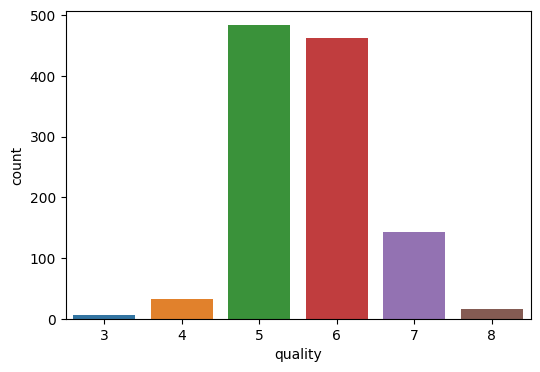

In [57]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['quality']);

The plot clearly shows a significant class imbalance in the target variable.

In [58]:
num_features = [col for col in df.columns if col != 'quality' and not col.endswith('num')]

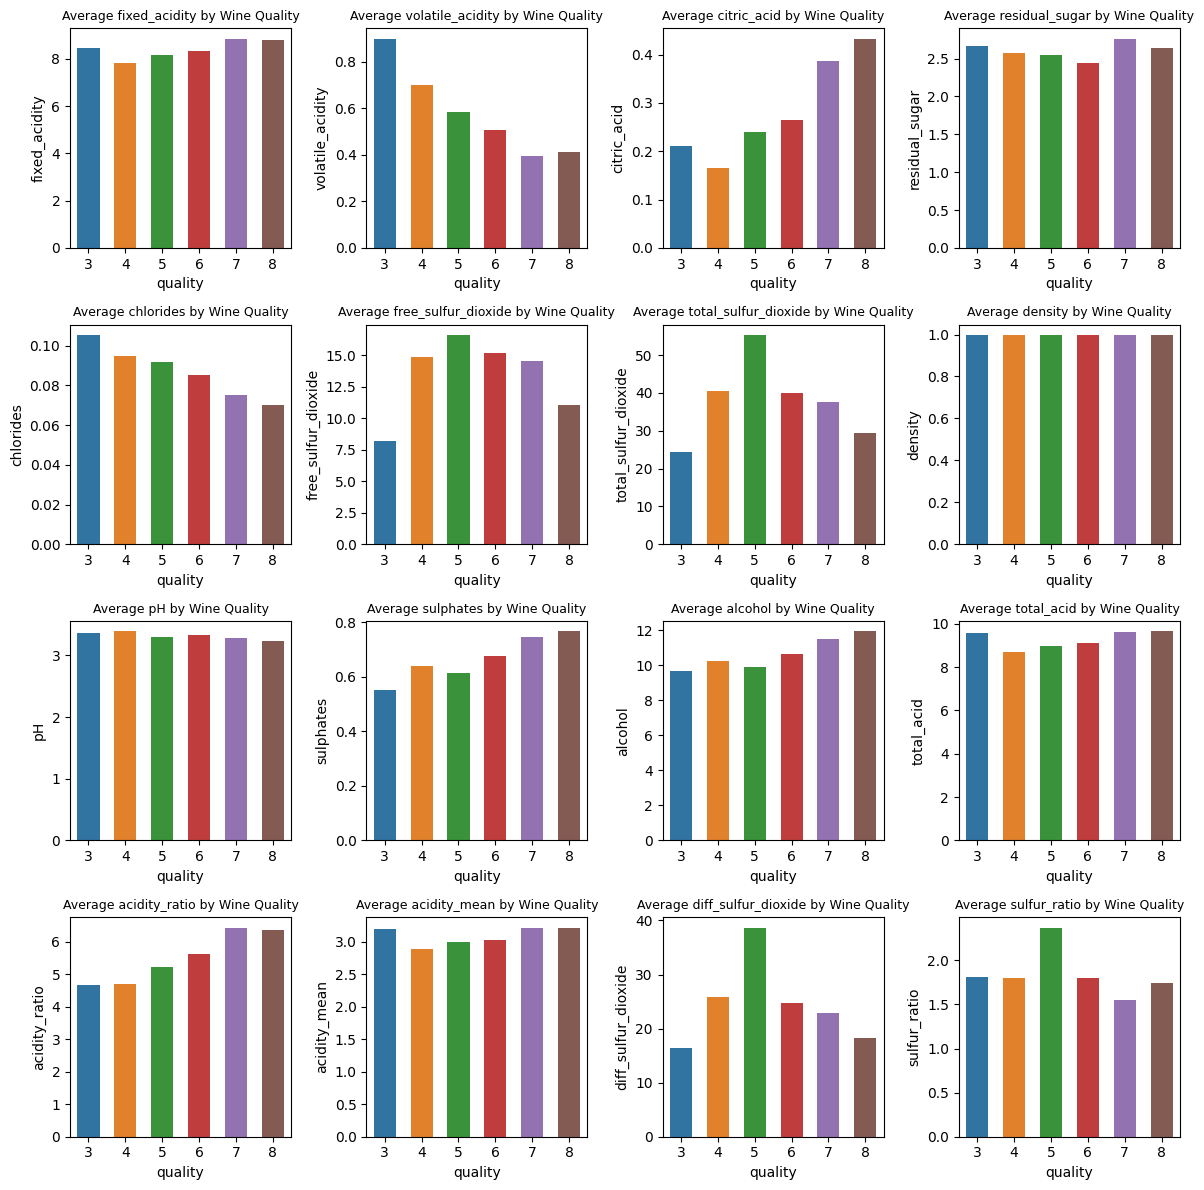

In [59]:
n_cols = 4
n_rows = (len(num_features) + 1) // n_cols  

plt.figure(figsize=(12, 3 * n_rows))
for i, feature in enumerate(num_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.barplot(x='quality', 
                y=feature, 
                data=df.groupby('quality')[feature].mean().reset_index(), 
                width=0.6, 
               )
    plt.title(f'Average {feature} by Wine Quality', fontsize=9)
plt.tight_layout()
plt.show()

Conclusion:
1. The plots show how the average value of individual features varies depending on the wine quality class.
2. There are noticeable differences between the classes, which suggests that these features could be useful in distinguishing wine quality.

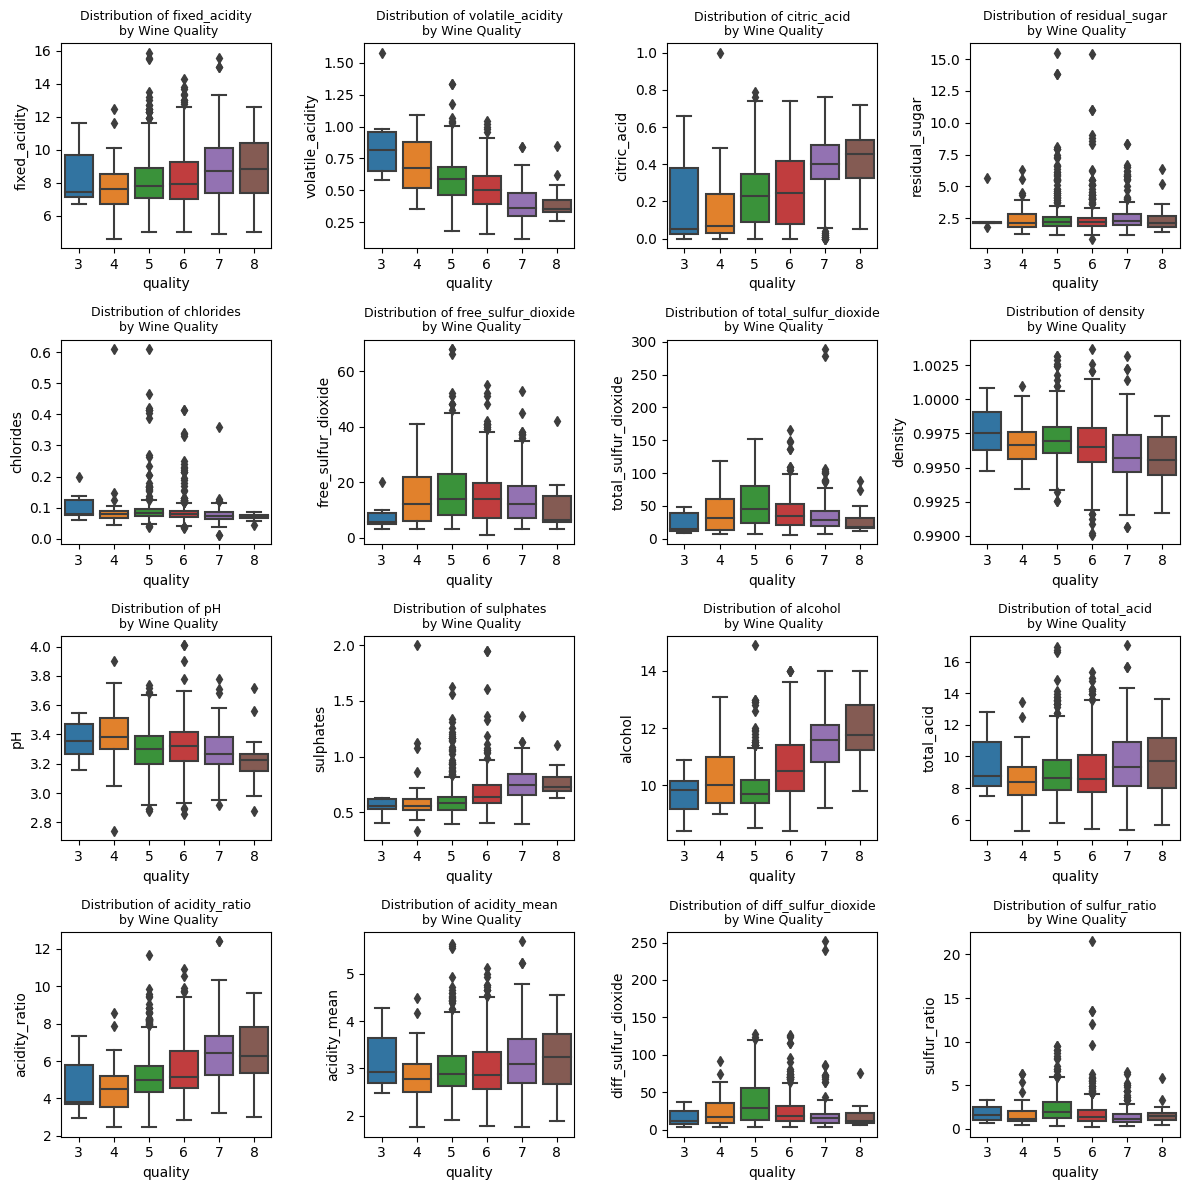

In [60]:
n_cols = 4
n_rows = (len(num_features) + 1) // n_cols
plt.figure(figsize=(12, 3 * n_rows))
for i, feature in enumerate(num_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='quality', y=feature, data=df)
    plt.title(f"Distribution of {feature}\n by Wine Quality", fontsize=9)
plt.tight_layout()
plt.show()

Conclusion:
1. If the median for one class is higher than for another, the feature may be significant.
2. If the distributions of features are overlapping, the variable may not differentiate the classes well, suggesting its lower relevance in the model.
3. Outliers may indicate unusual cases in the data that we have already observed during the analysis, and in the models, we will test various scenarios.

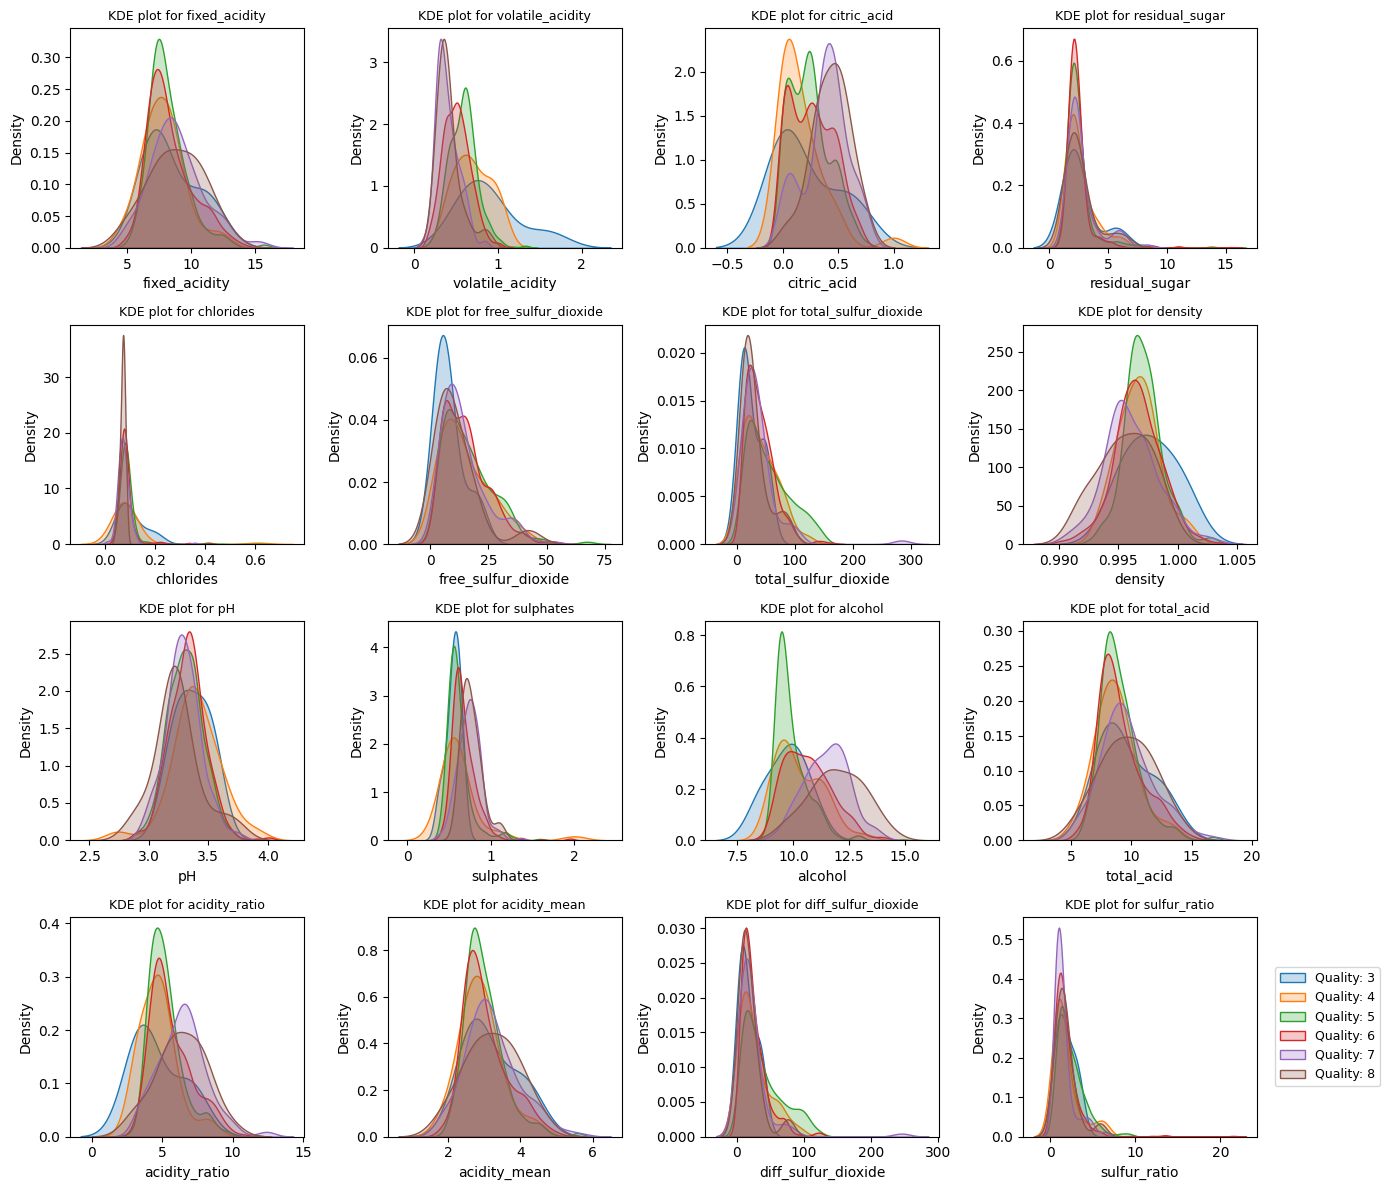

In [61]:
n_cols = 4
n_rows = (len(num_features) + 1) // n_cols  

plt.figure(figsize=(14, 3 * n_rows))  
for i, feature in enumerate(num_features):
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.kdeplot(df[df['quality'] == 3][feature], label='Quality: 3', shade=True)
    sns.kdeplot(df[df['quality'] == 4][feature], label='Quality: 4', shade=True)
    sns.kdeplot(df[df['quality'] == 5][feature], label='Quality: 5', shade=True)
    sns.kdeplot(df[df['quality'] == 6][feature], label='Quality: 6', shade=True)
    sns.kdeplot(df[df['quality'] == 7][feature], label='Quality: 7', shade=True)
    sns.kdeplot(df[df['quality'] == 8][feature], label='Quality: 8', shade=True)

    plt.title(f'KDE plot for {feature}', fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=9)
plt.tight_layout()
plt.show()

Conclusion:
1. On the KDE plots for each feature, we can observe how the distributions differ depending on the wine quality class.
2. Often, there are noticeable differences in the shape and width of the distributions between the classes, which suggests that these features may play a role in distinguishing wine quality.

# **Utils**

In [62]:
def run_pipeline(pipeline, param_grid, data: dict, resample=None):
    name, (X, y) = data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    
    n_splits = 5
    if name != 'full':
        n_splits = 4
    kappa_scorer = make_scorer(cohen_kappa_score, weights='quadratic')
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    grid_search = GridSearchCV(pipeline, 
                               param_grid, 
                               cv=skf, 
                               scoring={'Kappa': kappa_scorer,
                                        'F1': 'f1_weighted'},
                               refit='Kappa',
                               n_jobs=-1,
                               error_score='raise')
    grid_search.fit(X_train, y_train)

    if name == 'full':
        print(f'\nFeature Importances:')
        print(get_important_features(grid_search, 
                                     X_train, 
                                     y_train, 
                                     scoring=kappa_scorer))

    return get_metrics(grid_search, X_train, X_test, y_train, y_test, name, resample)


def get_metrics(grid_search, X_train, X_test, y_train, y_test, name, resample):
    y_test_pred = grid_search.best_estimator_.predict(X_test)
    y_train_pred = grid_search.best_estimator_.predict(X_train)

    model = grid_search.best_estimator_.named_steps['model']
    best_s = grid_search.best_score_
    best_p = grid_search.best_params_
    train_roc_auc_avg, test_roc_auc_avg, n_classes, \
                fpr, tpr, lb, roc_auc, model = process_roc_curve(model, 
                                                                 X_train, 
                                                                 X_test, 
                                                                 y_train, 
                                                                 y_test,
                                                                 resample)
    
    print(f'\nMetrics for [{name}] dataset:')
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    create_conf_matrix(ax[0], y_test, y_test_pred)
    create_roc_auc(ax[1], n_classes, fpr, tpr, lb, roc_auc, model)
    plt.show()

    ck_score_train = cohen_kappa_score(y_train, y_train_pred, weights='quadratic')
    ck_score_test = cohen_kappa_score(y_test, y_test_pred, weights='quadratic')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    df_metrics = pd.DataFrame({
        'roc_auc_avg': [train_roc_auc_avg, test_roc_auc_avg],
        'f1_score': [f1_train, f1_test],
        'cohen_kappa': [ck_score_train, ck_score_test]
    }, index=['train', 'test'])

    print(df_metrics)
    print('-'*60)
    return {
        'model': model.__class__.__name__,
        'data_frame': name,
        'best_params': best_p,
        'best_score': best_s,
        'roc_auc_micro_avg': test_roc_auc_avg,
        'cohen_kappa_score': ck_score_test,
        'f1_score': f1_test,
        'resample': resample,
    }


In [63]:
def process_roc_curve(model, X_train, X_test, y_train, y_test, resample):
    """This function trains the given model on the data to plots the ROC curve."""
    lb = LabelBinarizer()
    if resample == 'smote':
        X_train, y_train = smote(X_train, y_train)
        
    elif resample == 'smotenc':
        X_train, y_train = smotenc(X_train, y_train)
        
    y_train_bin = lb.fit_transform(y_train)
    y_test_bin = lb.transform(y_test)
    
    if not hasattr(model, 'predict_proba'):
        return f"Model {model.__class__.__name__} does not support predict_proba(), \
                so the ROC curve cannot be created"

   # we train on original labels, not the binarized version
    model.fit(X_train, y_train)
    y_probs_train = model.predict_proba(X_train)
    y_probs_test = model.predict_proba(X_test)

    train_roc_auc_avg = roc_auc_score(y_train_bin, y_probs_train, average='micro', multi_class='ovr')
    test_roc_auc_avg = roc_auc_score(y_test_bin, y_probs_test, average='micro', multi_class='ovr')

    n_classes = y_test_bin.shape[1]
    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_test[:, i])
        try:
            roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_probs_test[:, i])
        except ValueError:
            roc_auc[i] = float('nan')

    return train_roc_auc_avg, test_roc_auc_avg, n_classes, fpr, tpr, lb, roc_auc, model

In [64]:
def create_conf_matrix(ax, y_test, y_test_pred):
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')
    

def create_roc_auc(ax, n_classes, fpr, tpr, lb, roc_auc, model):
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

    ax.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {model.__class__.__name__}')
    ax.legend(loc='lower right', fontsize=8)
    ax.grid(True)
    

def smote(X_train, y_train):
    smote = SMOTE(k_neighbors=2, random_state=42)
    return smote.fit_resample(X_train, y_train)


def smotenc(X_train, y_train):
    cat_indices = [X_train.columns.get_loc(col) for col in X_train.columns if col.endswith('num')]
    
    smotenc = SMOTENC(categorical_features=cat_indices,
                      k_neighbors=2,
                      random_state=42)

    return smotenc.fit_resample(X_train, y_train)

In [65]:
def get_important_features(grid_search, X_train, y_train, scoring):
    results = permutation_importance(grid_search.best_estimator_, X_train, y_train, scoring=scoring)
    importances = results.importances_mean
    
    results = []
    for i, importance in enumerate(importances):
        results.append({
            'Feature': X_train.columns[i],
            'Importance': importance
        })
    return pd.DataFrame(results).sort_values(by='Importance', ascending=False)


# **Modeling**

In [66]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,...,quality,total_acid,acidity_ratio,acidity_mean,diff_sulfur_dioxide,sulfur_ratio,fixed_acidity_groups_num,density_groups_num,pH_groups_num,sulphates_groups_num
Id,,,,,,,,,,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,5,8.10,4.352941,2.700000,23.0,1.916667,1,4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,5,8.68,4.148936,2.893333,42.0,1.615385,2,3,1,3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,5,8.60,4.431818,2.866667,39.0,2.437500,2,3,2,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,6,12.04,8.750000,4.013333,43.0,2.388889,5,4,0,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,5,8.10,4.352941,2.700000,23.0,1.916667,1,4,5,1


In [67]:
dfs_cat = {
    'full': (df.drop(['quality'], axis=1), df['quality']),
    'w/o-outliers': (df_out.drop(['quality'], axis=1), df_out['quality']),
    'less-outliers': (df_less_out.drop(['quality'], axis=1), df_less_out['quality'])
}

In [68]:
dfs = {
    'full': (df.drop(['quality']+cat_features, axis=1), df['quality']),
    'w/o-outliers': (df_out.drop(['quality']+cat_features, axis=1), df_out['quality']),
    'less-outliers': (df_less_out.drop(['quality']+cat_features, axis=1), df_less_out['quality'])
}

## **KNeighborsClassifier**


Feature Importances:
                 Feature  Importance
10               alcohol    0.555930
1       volatile_acidity    0.446152
9              sulphates    0.423129
2            citric_acid    0.398581
7                density    0.382285
12         acidity_ratio    0.373879
0          fixed_acidity    0.352981
11            total_acid    0.352794
8                     pH    0.339841
3         residual_sugar    0.000000
4              chlorides    0.000000
5    free_sulfur_dioxide    0.000000
6   total_sulfur_dioxide    0.000000
13          acidity_mean    0.000000
14   diff_sulfur_dioxide    0.000000
15          sulfur_ratio    0.000000

Metrics for [full] dataset:


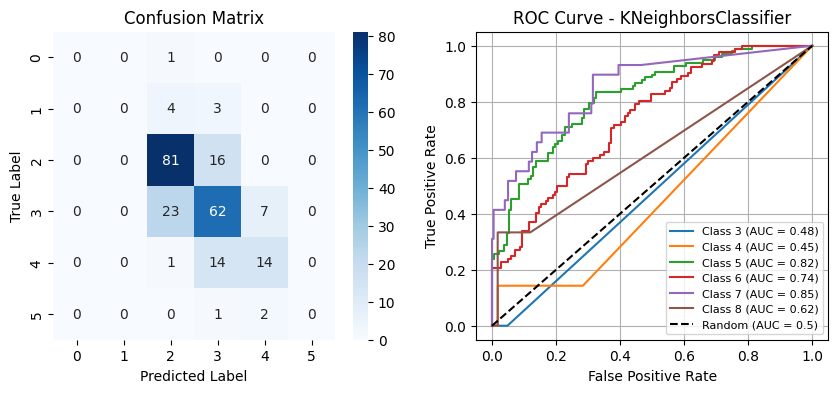

       roc_auc_avg  f1_score  cohen_kappa
train     1.000000  1.000000     1.000000
test      0.903825  0.664669     0.637058
------------------------------------------------------------

Metrics for [w/o-outliers] dataset:


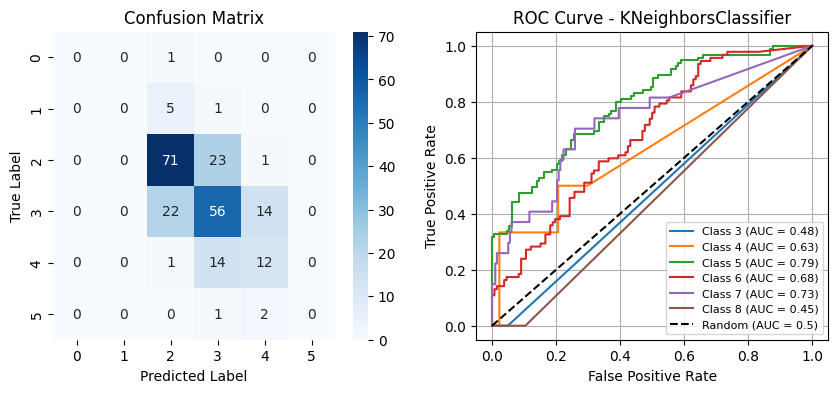

       roc_auc_avg  f1_score  cohen_kappa
train     1.000000  1.000000     1.000000
test      0.882051  0.606484     0.595449
------------------------------------------------------------

Metrics for [less-outliers] dataset:


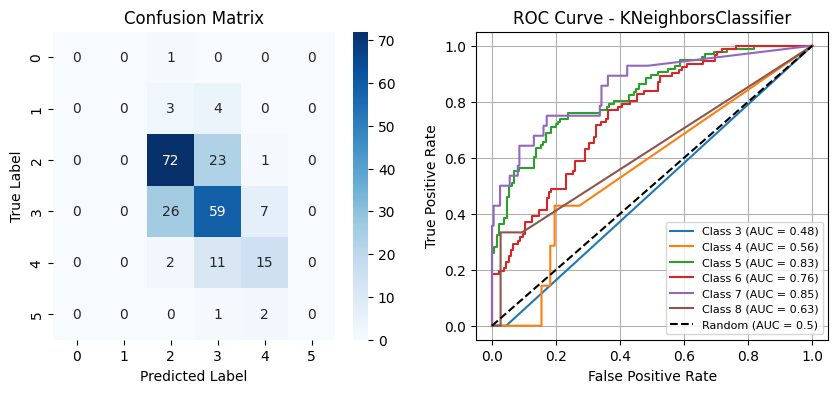

       roc_auc_avg  f1_score  cohen_kappa
train     1.000000  1.000000     1.000000
test      0.911582  0.626017     0.562776
------------------------------------------------------------


,model,data_frame,best_params,best_score,roc_auc_micro_avg,cohen_kappa_score,f1_score,resample
0,KNeighborsClassifier,full,{'model__n_neighbors': 13},0.583265,0.903825,0.637058,0.664669,None
1,KNeighborsClassifier,w/o-outliers,{'model__n_neighbors': 13},0.604067,0.882051,0.595449,0.606484,None
2,KNeighborsClassifier,less-outliers,{'model__n_neighbors': 13},0.574635,0.911582,0.562776,0.626017,None


In [69]:
# num_f contains the most important features after testing
feature_imp = ['acidity_mean', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'diff_sulfur_dioxide', 'sulfur_ratio', 'residual_sugar', 'chlorides']
num_f = df.drop(['quality']+cat_features+feature_imp, axis=1).columns.tolist()

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
                            ('num', StandardScaler(), num_f)
                    ])
    ),
    ('model', KNeighborsClassifier(weights='distance'))
])

param_grid = {
    'model__n_neighbors': [3, 5, 7, 11, 13],
}

df_results = pd.DataFrame()
for data in dfs.items():
    result = run_pipeline(pipeline, param_grid, data)
    df_results = pd.concat([df_results, pd.DataFrame([result])], axis=0, ignore_index=True)

df_results

## **KNeighborsClassifier + SMOTE**


Feature Importances:
                     Feature  Importance
10                   alcohol    0.357586
1           volatile_acidity    0.270728
7                    density    0.268655
19      sulphates_groups_num    0.261965
17        density_groups_num    0.257885
16  fixed_acidity_groups_num    0.243073
2                citric_acid    0.236997
8                         pH    0.229568
18             pH_groups_num    0.227483
9                  sulphates    0.226016
12             acidity_ratio    0.221789
0              fixed_acidity    0.217770
11                total_acid    0.216576
4                  chlorides    0.000000
5        free_sulfur_dioxide    0.000000
6       total_sulfur_dioxide    0.000000
3             residual_sugar    0.000000
13              acidity_mean    0.000000
14       diff_sulfur_dioxide    0.000000
15              sulfur_ratio    0.000000

Metrics for [full] dataset:


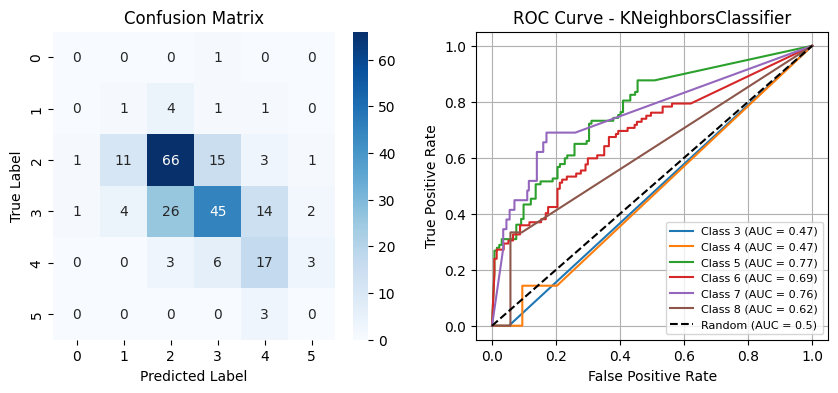

       roc_auc_avg  f1_score  cohen_kappa
train     1.000000  1.000000     1.000000
test      0.805223  0.578173     0.513931
------------------------------------------------------------

Metrics for [w/o-outliers] dataset:


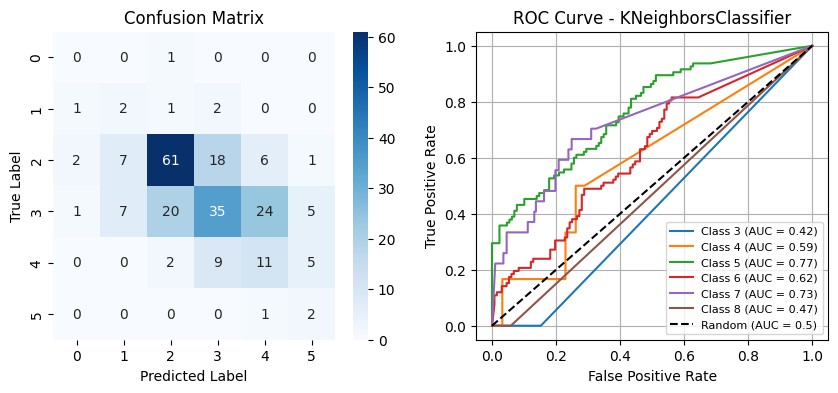

       roc_auc_avg  f1_score  cohen_kappa
train     1.000000  1.000000     1.000000
test      0.802989  0.518395     0.495128
------------------------------------------------------------

Metrics for [less-outliers] dataset:


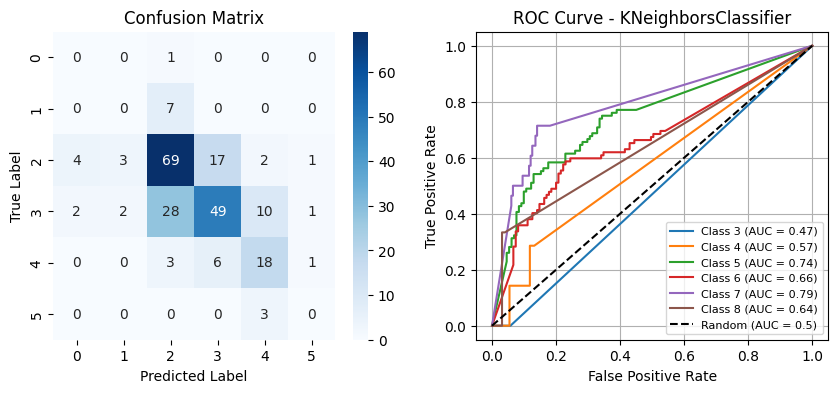

       roc_auc_avg  f1_score  cohen_kappa
train     1.000000  1.000000     1.000000
test      0.783842  0.601063     0.536821
------------------------------------------------------------


,model,data_frame,best_params,best_score,roc_auc_micro_avg,cohen_kappa_score,f1_score,resample
0,KNeighborsClassifier,full,{'model__n_neighbors': 13},0.583265,0.903825,0.637058,0.664669,None
1,KNeighborsClassifier,w/o-outliers,{'model__n_neighbors': 13},0.604067,0.882051,0.595449,0.606484,None
2,KNeighborsClassifier,less-outliers,{'model__n_neighbors': 13},0.574635,0.911582,0.562776,0.626017,None
3,KNeighborsClassifier,full,"{'model__n_neighbors': 5, 'smote__k_neighbors': 1}",0.509037,0.805223,0.513931,0.578173,smotenc
4,KNeighborsClassifier,w/o-outliers,"{'model__n_neighbors': 7, 'smote__k_neighbors': 1}",0.528563,0.802989,0.495128,0.518395,smotenc
5,KNeighborsClassifier,less-outliers,"{'model__n_neighbors': 3, 'smote__k_neighbors': 1}",0.521993,0.783842,0.536821,0.601063,smotenc


In [70]:
cat_indices = [df.columns.get_loc(col) for col in cat_features]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_f),
    ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_features)
])

pipeline = imbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTENC(categorical_features=cat_indices,
                      random_state=42)),
    ('model', KNeighborsClassifier(weights='distance'))
])

param_grid = {
    'smote__k_neighbors': [1, 2],
    'model__n_neighbors': [3, 5, 7, 11, 13],
}


for data in dfs_cat.items():
    result = run_pipeline(pipeline, param_grid, data, resample='smotenc')
    df_results = pd.concat([df_results, pd.DataFrame([result])], axis=0, ignore_index=True)

df_results

## **KNeighborsClassifier + SMOTENC**


Feature Importances:
                 Feature  Importance
10               alcohol    0.585756
7                density    0.427431
1       volatile_acidity    0.418593
9              sulphates    0.413281
8                     pH    0.358335
12         acidity_ratio    0.355341
2            citric_acid    0.353435
0          fixed_acidity    0.336012
11            total_acid    0.330478
3         residual_sugar    0.000000
4              chlorides    0.000000
5    free_sulfur_dioxide    0.000000
6   total_sulfur_dioxide    0.000000
13          acidity_mean    0.000000
14   diff_sulfur_dioxide    0.000000
15          sulfur_ratio    0.000000

Metrics for [full] dataset:


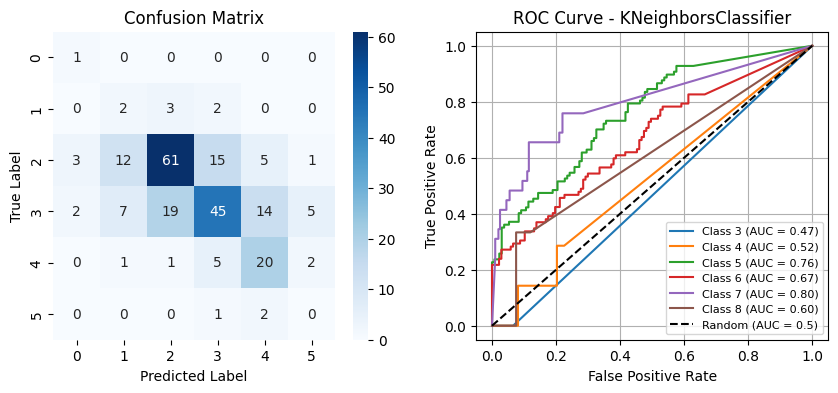

       roc_auc_avg  f1_score  cohen_kappa
train     1.000000  1.000000     1.000000
test      0.812341  0.589318     0.505567
------------------------------------------------------------

Metrics for [w/o-outliers] dataset:


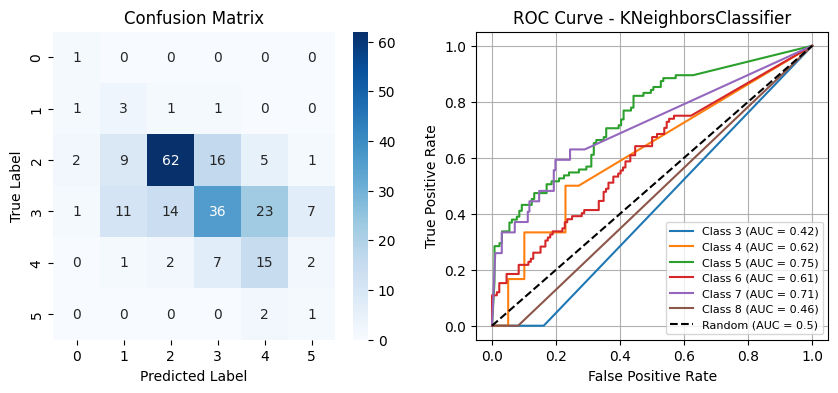

       roc_auc_avg  f1_score  cohen_kappa
train     1.000000  1.000000     1.000000
test      0.772885  0.555768     0.495803
------------------------------------------------------------

Metrics for [less-outliers] dataset:


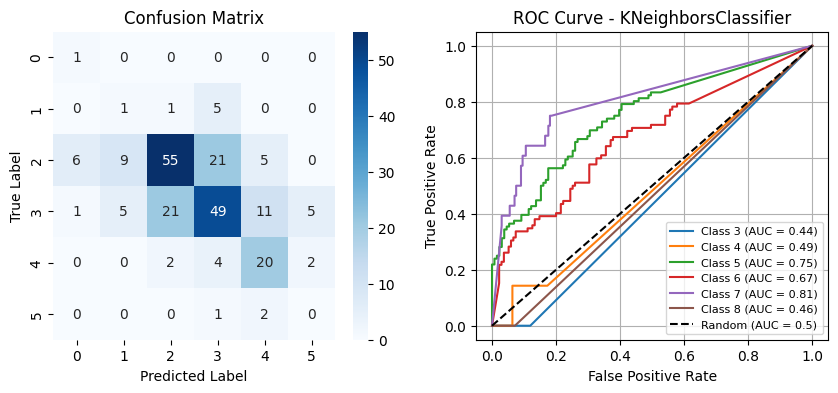

       roc_auc_avg  f1_score  cohen_kappa
train       1.0000  1.000000     1.000000
test        0.7958  0.575285     0.502059
------------------------------------------------------------


,model,data_frame,best_params,best_score,roc_auc_micro_avg,cohen_kappa_score,f1_score,resample
0,KNeighborsClassifier,full,{'model__n_neighbors': 13},0.583265,0.903825,0.637058,0.664669,None
1,KNeighborsClassifier,w/o-outliers,{'model__n_neighbors': 13},0.604067,0.882051,0.595449,0.606484,None
2,KNeighborsClassifier,less-outliers,{'model__n_neighbors': 13},0.574635,0.911582,0.562776,0.626017,None
3,KNeighborsClassifier,full,"{'model__n_neighbors': 5, 'smote__k_neighbors': 1}",0.509037,0.805223,0.513931,0.578173,smotenc
4,KNeighborsClassifier,w/o-outliers,"{'model__n_neighbors': 7, 'smote__k_neighbors': 1}",0.528563,0.802989,0.495128,0.518395,smotenc
5,KNeighborsClassifier,less-outliers,"{'model__n_neighbors': 3, 'smote__k_neighbors': 1}",0.521993,0.783842,0.536821,0.601063,smotenc
6,KNeighborsClassifier,full,"{'model__n_neighbors': 7, 'smote__k_neighbors': 1}",0.478212,0.812341,0.505567,0.589318,smote
7,KNeighborsClassifier,w/o-outliers,"{'model__n_neighbors': 7, 'smote__k_neighbors': 1}",0.488272,0.772885,0.495803,0.555768,smote
8,KNeighborsClassifier,less-outliers,"{'model__n_neighbors': 5, 'smote__k_neighbors': 2}",0.500359,0.795800,0.502059,0.575285,smote


In [71]:
pipeline = imbPipeline([
    ('preprocessor', ColumnTransformer([
                            ('num', StandardScaler(), num_f),
                    ])
    ),
    ('smote', SMOTE(random_state=42)),  
    ('model', KNeighborsClassifier(weights='distance'))  
])

param_grid = {
    'smote__k_neighbors': [1, 2],
    'model__n_neighbors': [3, 5, 7, 11, 13],
}

for data in dfs.items():
    result = run_pipeline(pipeline, param_grid, data, resample='smote')
    df_results = pd.concat([df_results, pd.DataFrame([result])], axis=0, ignore_index=True)

df_results

------------------------------------------------------------------------------------

# **RandomForestClassifier** 


Feature Importances:
                 Feature  Importance
10               alcohol    0.124313
9              sulphates    0.098860
7                density    0.013428
15          sulfur_ratio    0.013007
14   diff_sulfur_dioxide    0.002076
3         residual_sugar    0.000936
11            total_acid    0.000004
0          fixed_acidity   -0.000343
13          acidity_mean   -0.001389
6   total_sulfur_dioxide   -0.001424
5    free_sulfur_dioxide   -0.002925
4              chlorides   -0.006216
1       volatile_acidity   -0.007170
8                     pH   -0.011605
12         acidity_ratio   -0.012017
2            citric_acid   -0.020654

Metrics for [full] dataset:


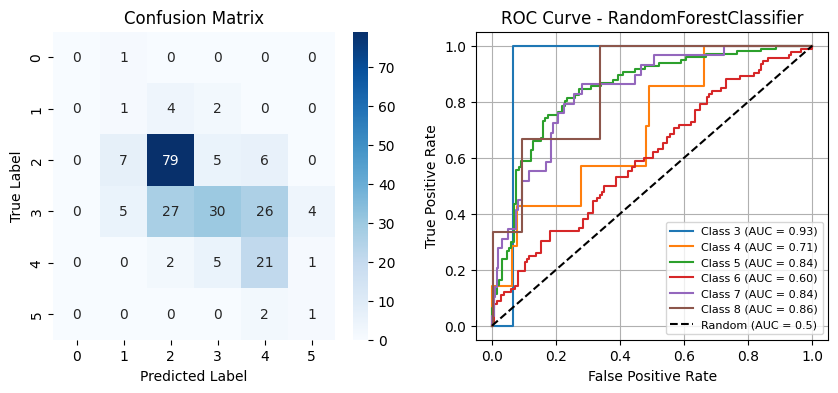

       roc_auc_avg  f1_score  cohen_kappa
train     0.923848  0.625405     0.658763
test      0.883881  0.569247     0.585613
------------------------------------------------------------

Metrics for [w/o-outliers] dataset:


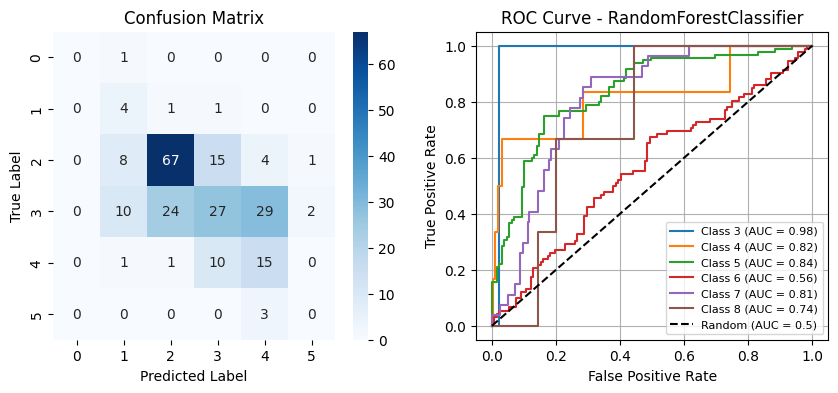

       roc_auc_avg  f1_score  cohen_kappa
train     0.936160  0.667351     0.689077
test      0.868646  0.508748     0.498962
------------------------------------------------------------

Metrics for [less-outliers] dataset:


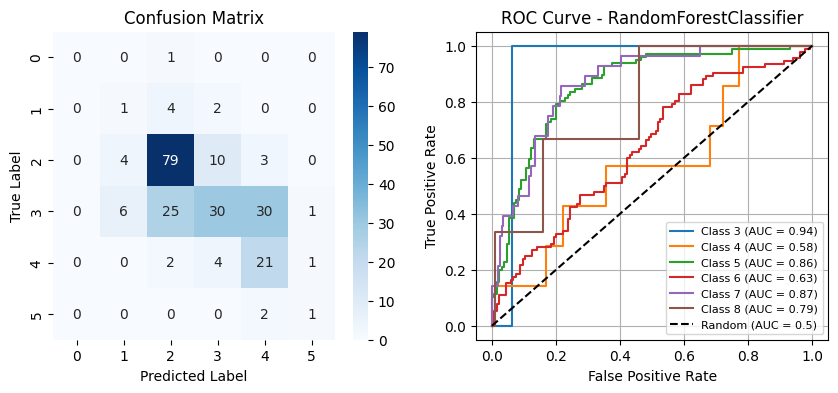

       roc_auc_avg  f1_score  cohen_kappa
train     0.927234  0.632013     0.701747
test      0.884255  0.568516     0.596055
------------------------------------------------------------


,model,data_frame,best_params,best_score,roc_auc_micro_avg,cohen_kappa_score,f1_score,resample
0,KNeighborsClassifier,full,{'model__n_neighbors': 13},0.583265,0.903825,0.637058,0.664669,None
1,KNeighborsClassifier,w/o-outliers,{'model__n_neighbors': 13},0.604067,0.882051,0.595449,0.606484,None
2,KNeighborsClassifier,less-outliers,{'model__n_neighbors': 13},0.574635,0.911582,0.562776,0.626017,None
3,KNeighborsClassifier,full,"{'model__n_neighbors': 5, 'smote__k_neighbors': 1}",0.509037,0.805223,0.513931,0.578173,smotenc
4,KNeighborsClassifier,w/o-outliers,"{'model__n_neighbors': 7, 'smote__k_neighbors': 1}",0.528563,0.802989,0.495128,0.518395,smotenc
5,KNeighborsClassifier,less-outliers,"{'model__n_neighbors': 3, 'smote__k_neighbors': 1}",0.521993,0.783842,0.536821,0.601063,smotenc
6,KNeighborsClassifier,full,"{'model__n_neighbors': 7, 'smote__k_neighbors': 1}",0.478212,0.812341,0.505567,0.589318,smote
7,KNeighborsClassifier,w/o-outliers,"{'model__n_neighbors': 7, 'smote__k_neighbors': 1}",0.488272,0.772885,0.495803,0.555768,smote
8,KNeighborsClassifier,less-outliers,"{'model__n_neighbors': 5, 'smote__k_neighbors': 2}",0.500359,0.795800,0.502059,0.575285,smote
9,RandomForestClassifier,full,"{'model__max_depth': 5, 'model__min_samples_leaf': 7, 'model__min_samples_split': 10, 'model__n_estimators': 100}",0.574899,0.883881,0.585613,0.569247,None


In [72]:
pipeline = Pipeline([
    ('model', RandomForestClassifier(class_weight='balanced'))
])

param_grid = {
    'model__n_estimators': [100, 150, 180], 
    'model__max_depth': [3, 5],
    'model__min_samples_split': [10, 15],
    'model__min_samples_leaf': [5, 7],
}


for data in dfs.items():
    result = run_pipeline(pipeline, param_grid, data)
    df_results = pd.concat([df_results, pd.DataFrame([result])], axis=0, ignore_index=True)

df_results

# **RandomForestClassifier + SMOTE**


Feature Importances:
                     Feature  Importance
19      sulphates_groups_num    0.295797
17        density_groups_num    0.105760
18             pH_groups_num    0.094404
16  fixed_acidity_groups_num    0.032163
1           volatile_acidity    0.000000
15              sulfur_ratio    0.000000
14       diff_sulfur_dioxide    0.000000
13              acidity_mean    0.000000
12             acidity_ratio    0.000000
11                total_acid    0.000000
0              fixed_acidity    0.000000
9                  sulphates    0.000000
8                         pH    0.000000
7                    density    0.000000
6       total_sulfur_dioxide    0.000000
5        free_sulfur_dioxide    0.000000
4                  chlorides    0.000000
3             residual_sugar    0.000000
2                citric_acid    0.000000
10                   alcohol    0.000000

Metrics for [full] dataset:


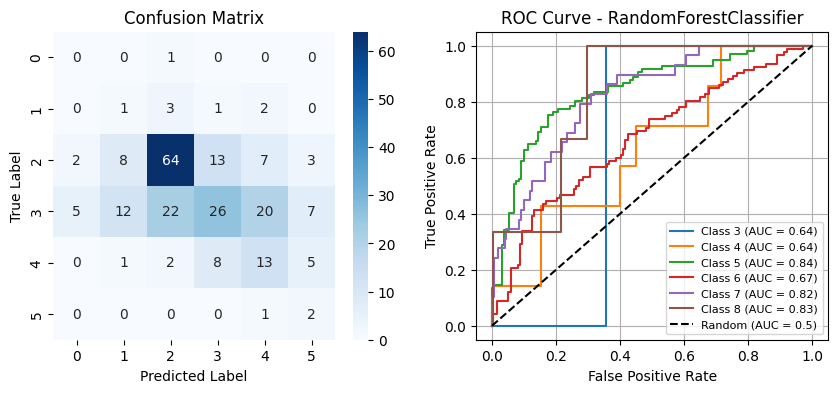

       roc_auc_avg  f1_score  cohen_kappa
train     0.973134  0.528542     0.405579
test      0.857737  0.486548     0.352052
------------------------------------------------------------

Metrics for [w/o-outliers] dataset:


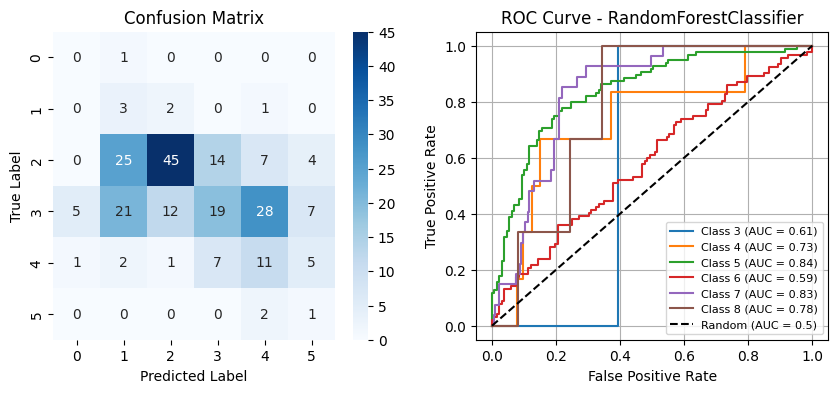

       roc_auc_avg  f1_score  cohen_kappa
train     0.975984  0.497414     0.400562
test      0.843140  0.403494     0.323341
------------------------------------------------------------

Metrics for [less-outliers] dataset:


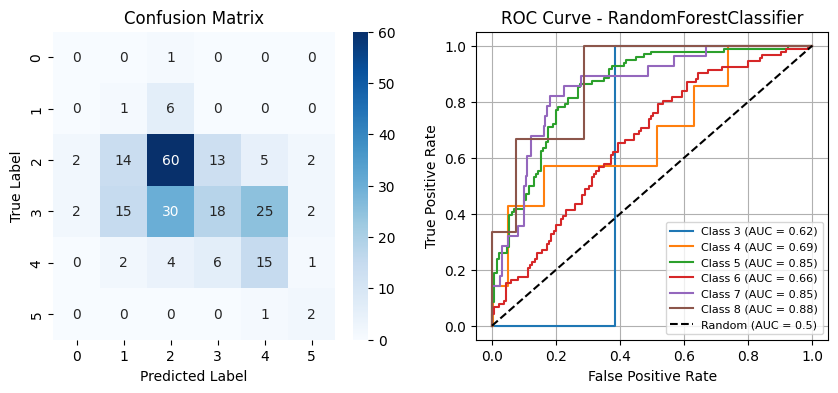

       roc_auc_avg  f1_score  cohen_kappa
train     0.974409  0.506151     0.384223
test      0.864337  0.427585     0.382205
------------------------------------------------------------


,model,data_frame,best_params,best_score,roc_auc_micro_avg,cohen_kappa_score,f1_score,resample
0,KNeighborsClassifier,full,{'model__n_neighbors': 13},0.583265,0.903825,0.637058,0.664669,None
1,KNeighborsClassifier,w/o-outliers,{'model__n_neighbors': 13},0.604067,0.882051,0.595449,0.606484,None
2,KNeighborsClassifier,less-outliers,{'model__n_neighbors': 13},0.574635,0.911582,0.562776,0.626017,None
3,KNeighborsClassifier,full,"{'model__n_neighbors': 5, 'smote__k_neighbors': 1}",0.509037,0.805223,0.513931,0.578173,smotenc
4,KNeighborsClassifier,w/o-outliers,"{'model__n_neighbors': 7, 'smote__k_neighbors': 1}",0.528563,0.802989,0.495128,0.518395,smotenc
5,KNeighborsClassifier,less-outliers,"{'model__n_neighbors': 3, 'smote__k_neighbors': 1}",0.521993,0.783842,0.536821,0.601063,smotenc
6,KNeighborsClassifier,full,"{'model__n_neighbors': 7, 'smote__k_neighbors': 1}",0.478212,0.812341,0.505567,0.589318,smote
7,KNeighborsClassifier,w/o-outliers,"{'model__n_neighbors': 7, 'smote__k_neighbors': 1}",0.488272,0.772885,0.495803,0.555768,smote
8,KNeighborsClassifier,less-outliers,"{'model__n_neighbors': 5, 'smote__k_neighbors': 2}",0.500359,0.795800,0.502059,0.575285,smote
9,RandomForestClassifier,full,"{'model__max_depth': 5, 'model__min_samples_leaf': 7, 'model__min_samples_split': 10, 'model__n_estimators': 100}",0.574899,0.883881,0.585613,0.569247,None


In [73]:
cat_indices = [df.columns.get_loc(col) for col in cat_features]

pipeline = imbPipeline([
    ('preprocessor', ColumnTransformer([
                       ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
                    ])
    ),
    ('smotenc', SMOTENC(categorical_features=cat_indices,
                      k_neighbors=2,
                      random_state=42)),  
    ('model', RandomForestClassifier(class_weight='balanced'))
])

param_grid = {
    'model__n_estimators': [100, 150, 200], 
    'model__max_depth': [3, 5],
    'model__min_samples_split': [10, 15],
    'model__min_samples_leaf': [5, 7],
}

for data in dfs_cat.items():
    result = run_pipeline(pipeline, param_grid, data, resample='smotenc')
    df_results = pd.concat([df_results, pd.DataFrame([result])], axis=0, ignore_index=True)

df_results

# **RandomForestClassifier + SMOTENC**


Feature Importances:
                 Feature  Importance
10               alcohol    0.181732
9              sulphates    0.114697
1       volatile_acidity    0.065764
4              chlorides    0.029744
8                     pH    0.021092
5    free_sulfur_dioxide    0.017970
7                density    0.014057
3         residual_sugar    0.012733
15          sulfur_ratio    0.011073
14   diff_sulfur_dioxide    0.009668
11            total_acid    0.007788
12         acidity_ratio    0.006803
6   total_sulfur_dioxide    0.006619
0          fixed_acidity    0.006490
2            citric_acid    0.005143
13          acidity_mean    0.004497

Metrics for [full] dataset:


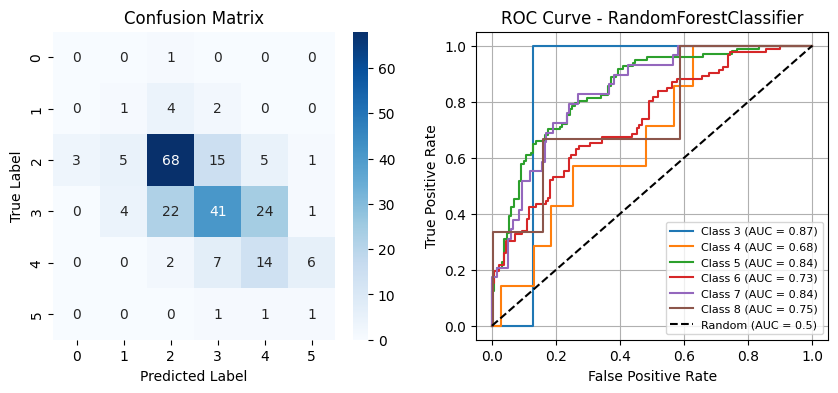

       roc_auc_avg  f1_score  cohen_kappa
train     0.993424  0.797933     0.769939
test      0.893721  0.559798     0.549144
------------------------------------------------------------

Metrics for [w/o-outliers] dataset:


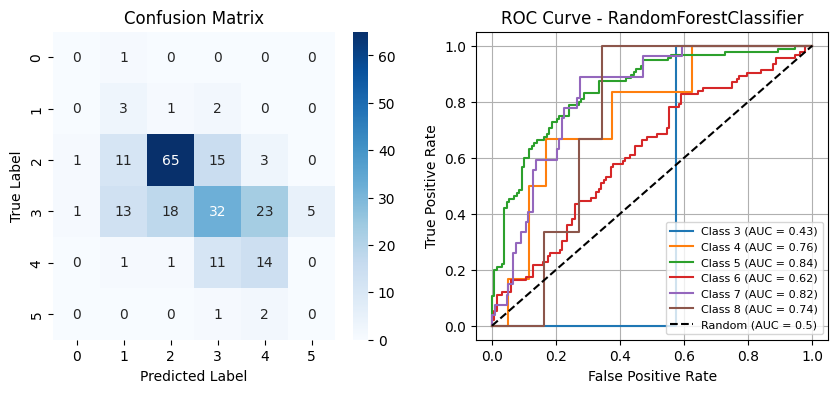

       roc_auc_avg  f1_score  cohen_kappa
train     0.993206  0.791720     0.783531
test      0.868957  0.531607     0.465006
------------------------------------------------------------

Metrics for [less-outliers] dataset:


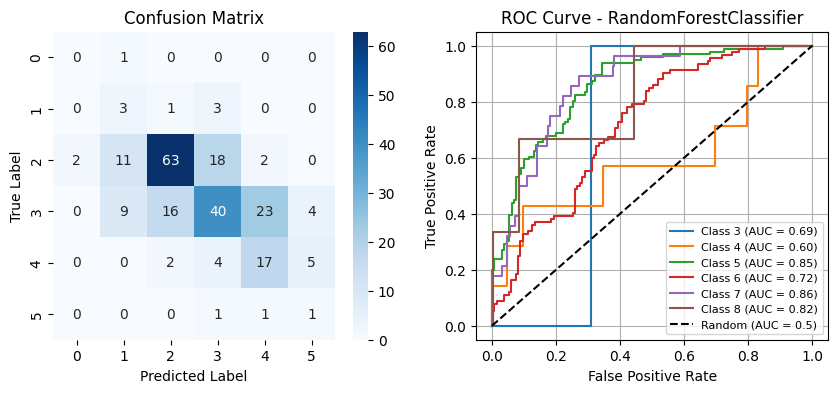

       roc_auc_avg  f1_score  cohen_kappa
train     0.991038  0.748658     0.717115
test      0.886992  0.571639     0.571275
------------------------------------------------------------


,model,data_frame,best_params,best_score,roc_auc_micro_avg,cohen_kappa_score,f1_score,resample
0,KNeighborsClassifier,full,{'model__n_neighbors': 13},0.583265,0.903825,0.637058,0.664669,None
1,KNeighborsClassifier,w/o-outliers,{'model__n_neighbors': 13},0.604067,0.882051,0.595449,0.606484,None
2,KNeighborsClassifier,less-outliers,{'model__n_neighbors': 13},0.574635,0.911582,0.562776,0.626017,None
3,KNeighborsClassifier,full,"{'model__n_neighbors': 5, 'smote__k_neighbors': 1}",0.509037,0.805223,0.513931,0.578173,smotenc
4,KNeighborsClassifier,w/o-outliers,"{'model__n_neighbors': 7, 'smote__k_neighbors': 1}",0.528563,0.802989,0.495128,0.518395,smotenc
5,KNeighborsClassifier,less-outliers,"{'model__n_neighbors': 3, 'smote__k_neighbors': 1}",0.521993,0.783842,0.536821,0.601063,smotenc
6,KNeighborsClassifier,full,"{'model__n_neighbors': 7, 'smote__k_neighbors': 1}",0.478212,0.812341,0.505567,0.589318,smote
7,KNeighborsClassifier,w/o-outliers,"{'model__n_neighbors': 7, 'smote__k_neighbors': 1}",0.488272,0.772885,0.495803,0.555768,smote
8,KNeighborsClassifier,less-outliers,"{'model__n_neighbors': 5, 'smote__k_neighbors': 2}",0.500359,0.795800,0.502059,0.575285,smote
9,RandomForestClassifier,full,"{'model__max_depth': 5, 'model__min_samples_leaf': 7, 'model__min_samples_split': 10, 'model__n_estimators': 100}",0.574899,0.883881,0.585613,0.569247,None


In [74]:
pipeline = imbPipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=2)),
    ('model', RandomForestClassifier())
])

param_grid = {
    'model__n_estimators': [100, 150, 200],
    'model__max_depth': [3, 7],
    'model__min_samples_split': [7, 10, 15],
    'model__min_samples_leaf': [3, 5, 7],
}

for data in dfs.items():
    result = run_pipeline(pipeline, param_grid, data, resample='smote')
    df_results = pd.concat([df_results, pd.DataFrame([result])], axis=0, ignore_index=True)

df_results